In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/Users/ADMIN/Desktop/Dissertation - Eth/Data/Ethereum 3 Year prices.csv')

In [4]:
data.shape

(1097, 9)

In [5]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
data.head()

,Date,Close,Open,High,Low,Vol.,Change %,Unnamed: 7,Unnamed: 8
2019-08-15,"Aug 15, 2019",187.80,186.59,189.30,176.08,14.03M,0.66%,X,NaN
2019-08-16,"Aug 16, 2019",184.55,187.67,188.03,179.35,11.33M,-1.73%,X,NaN
2019-08-17,"Aug 17, 2019",184.81,184.55,186.12,181.58,8.78M,0.14%,X,NaN
2019-08-18,"Aug 18, 2019",193.68,184.83,197.17,182.96,9.11M,4.80%,X,NaN
2019-08-19,"Aug 19, 2019",201.64,193.67,202.81,192.33,8.14M,4.11%,X,NaN


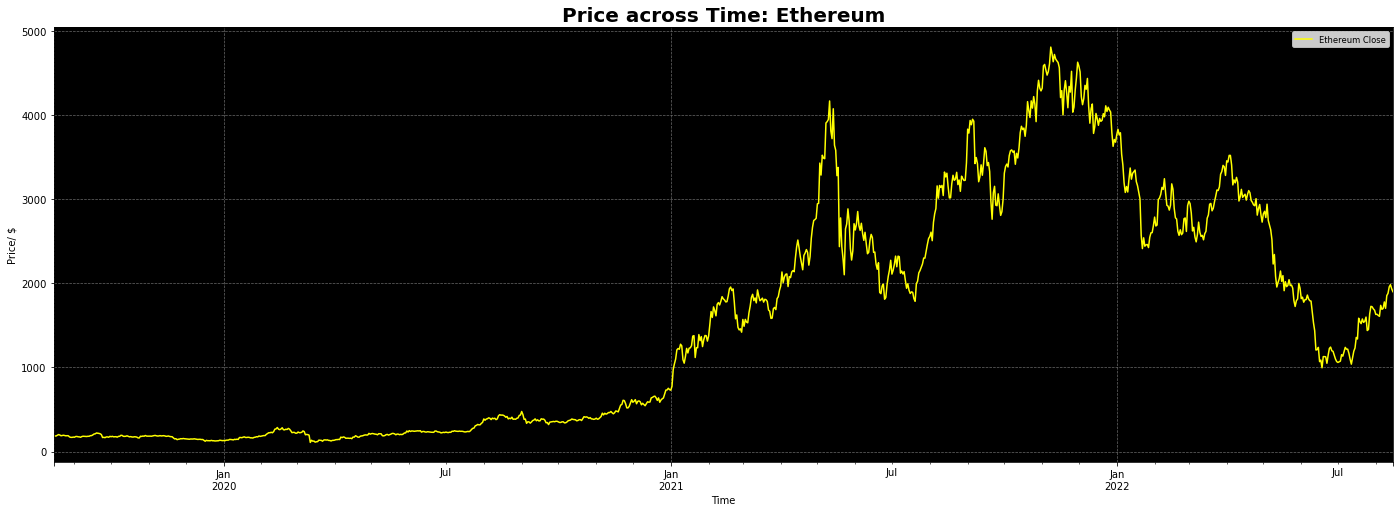

In [6]:
data.Close.plot(color='yellow', figsize=(24,8), label=f'Ethereum Close')

# Formating Graph
ax = plt.axes()
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

# labeling the graph neatly
plt.xlabel('Time')
plt.ylabel('Price/ $')
plt.title(f'Price across Time: Ethereum',  fontsize= 20, fontweight='bold')
plt.legend(loc='best', fontsize='small')

# Data Preparation

In [43]:
future_days = 90

In [44]:
# Create a new column
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

# Show the data
data[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,90_Day_Price_Forecast
2019-08-15,187.80,188.36
2019-08-16,184.55,185.25
2019-08-17,184.81,180.19
2019-08-18,193.68,182.42
2019-08-19,201.64,184.18
...,...,...
2022-08-11,1880.28,NaN
2022-08-12,1957.63,NaN
2022-08-13,1983.50,NaN
2022-08-14,1935.10,NaN


In [57]:
X = np.array(data[['Close']])
X = X[:data.shape[0]-future_days]
print(X)
print(len(X))

[[ 187.8 ]
 [ 184.55]
 [ 184.81]
 ...
 [2145.86]
 [2022.93]
 [2091.14]]
1007


In [58]:
y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)
print(len(y))

[ 188.36  185.25  180.19 ... 1983.5  1935.1  1900.25]
1007


# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

# Regression Model Fit

In [48]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [49]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.7692411340476908


In [68]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[2373.43730087 1668.65320306 3344.78958001 2065.71311522  294.7929602
 3191.65060275 2634.97611216  204.01187928  678.92634528 3072.7712158
 3172.39827286 2349.04484367 3044.78041215 2072.30048533  200.41599134
 2317.13825739 2584.19621221 2590.26637089  357.27472965 3285.72627534
  208.23542921  199.22600305  197.94629794  269.42385804  197.55165025
 3092.15511495 3117.66053166 3147.11914818 3329.60532315  222.55480419
 2864.89988493 3330.51927568 2709.46879543  857.07037455  838.45172223
 1957.42758735  277.91374693 3366.79602184 3135.09725968 2955.29159185
 1141.02615362 3144.77306692 2581.78058313  204.20208247  206.41303547
  197.1752294   208.21959443  213.46933666 1330.08976896 2707.65933222
  330.69107698 2724.23953066  234.50266449  199.6134014   205.04482164
  203.4348257   332.99873126  248.52347971 2815.77706043 2682.00196006
  209.95012497  200.20645206 1727.99966329  197.64025746 2532.5773524
 3119.73015875 1950.81473135 2859.23673691  280.38086809 2820.51629928
 2189.628

In [69]:
print(y_test)

[2665.24 1538.61 3021.93 1520.64  475.8  1151.19 3607.28  285.25  751.8
 4731.83 4082.8  2431.56 4475.   1438.52  196.14 3228.15 2492.53 2894.03
  199.58 3401.89  236.76  164.36  152.7   319.95  187.45 2949.92 4086.95
 3382.9  4720.87  244.56 2120.22 2342.3  2633.67  383.53  616.32 1680.
  185.96 4583.28 3417.34 2323.22 1612.99 3406.78 1972.93  245.53  390.23
  227.53  140.66  138.62 1778.82 1968.39  214.51 3876.78  400.79  145.79
  233.88  173.    200.51  351.63 3146.01 1979.35  170.27  142.58 1728.1
  226.93 2080.79 2725.29 2460.95 2596.52  433.9  1806.71 4517.36  199.97
  147.88 2834.91  601.68  246.96  448.23 1770.63  240.23 1115.83  135.59
  395.53  166.07  237.54 2705.09 1050.19 2237.17 3522.76 2922.55 1664.34
 1531.42  156.38 3959.83 1128.39 1935.1  1804.6  1989.14 3162.93 4034.53
 3569.43 1570.03]


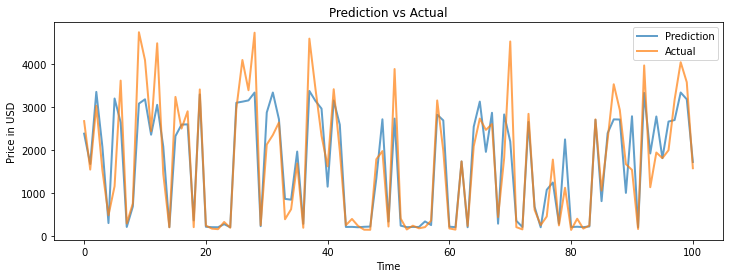

In [70]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Actual', lw=2, alpha=0.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()

In [71]:
import math
from sklearn.metrics import mean_squared_error

In [72]:
math.sqrt(mean_squared_error(svm_prediction, y_test))

613.493321048817

In [73]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, svm_prediction)
print("Mean absolute error : " + str(error))

Mean absolute error : 406.36379450440717


In [74]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test, svm_prediction)
print("MAPE: ", error2)

MAPE:  30.214349213540903


In [75]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
error_MAPE= MAPE(y_test, svm_prediction)
print("MAPE: ", error_MAPE)

MAPE:  0.30214349213540903
